# Analisis exploratorio
### Hoja de Trabajo 03
##### Jose Daniel Gomez 21429
##### https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns

#### Leer datos de un csv

In [2]:
data = pd.read_csv("train.csv")

#### Hacer un resumen del set de datos

In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Calcular el promedio de LotArea por MSSubClass (tipo de estructura)

In [4]:
# Define the mapping dictionary
subclass_labels = {
  20: '1-STORY 1946 & NEWER ALL STYLES',
  30: '1-STORY 1945 & OLDER',
  40: '1-STORY W/FINISHED ATTIC ALL AGES',
  45: '1-1/2 STORY - UNFINISHED ALL AGES',
  50: '1-1/2 STORY FINISHED ALL AGES',
  60: '2-STORY 1946 & NEWER',
  70: '2-STORY 1945 & OLDER',
  75: '2-1/2 STORY ALL AGES',
  80: 'SPLIT OR MULTI-LEVEL',
  85: 'SPLIT FOYER',
  90: 'DUPLEX - ALL STYLES AND AGES',
  120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  150: '1-1/2 STORY PUD - ALL AGES',
  160: '2-STORY PUD - 1946 & NEWER',
  180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
  190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
}

# Group by 'MSSubClass' and calculate mean 'LotArea'
betterMSSubclassPerLotArea = (data.groupby(['MSSubClass'], as_index=False)
  .agg({"LotArea":"mean"})
  .sort_values(by="LotArea", ascending=False)
  .assign(MSSubClassLabel = lambda df: df['MSSubClass'].map(subclass_labels))
  .reset_index(drop=True))

# Apply the mapping to the 'MSSubClass' column in 'betterMSSubclassPerLotArea'
betterMSSubclassPerLotArea['MSSubClassLabel'] = betterMSSubclassPerLotArea['MSSubClass'].map(subclass_labels)
betterMSSubclassPerLotArea

,MSSubClass,LotArea,MSSubClassLabel
0,190,16111.233333,2 FAMILY CONVERSION - ALL STYLES AND AGES
1,40,12559.750000,1-STORY W/FINISHED ATTIC ALL AGES
2,60,12058.076923,2-STORY 1946 & NEWER
3,20,11755.509328,1-STORY 1946 & NEWER ALL STYLES
4,75,11631.750000,2-1/2 STORY ALL AGES
5,80,10895.482759,SPLIT OR MULTI-LEVEL
6,50,10479.145833,1-1/2 STORY FINISHED ALL AGES
7,70,10120.166667,2-STORY 1945 & OLDER
8,90,9720.057692,DUPLEX - ALL STYLES AND AGES
9,85,9317.450000,SPLIT FOYER


#### Funcion para graficar una distribucion normal estimada de la variable

In [5]:
def graphNumericDistribution(data, title, xlabel, ylabel):
  mean = round(data.mean(), 2)
  median = round(data.median(), 2)
  mode = round(data.mode(), 2)
  max_value = round(data.max(), 2)
  min_value = round(data.min(), 2)
  plt.figure()
  sns.histplot(data, kde=True)
  # sns.barplot(data)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.axvline(mean, color='r', linestyle='--', label='Mean')
  plt.axvline(median, color='g', linestyle='--', label='Median')
  # plt.ylim(0, data.max())
  plt.legend()

  plt.text(0.98, 0.82, 'Mean: '+str(mean), transform=plt.gca().transAxes, ha='right', va='top')
  plt.text(0.98, 0.76, 'Median: '+str(median), transform=plt.gca().transAxes, ha='right', va='top')
  plt.text(0.98, 0.70, 'Mode: '+str(mode[0]), transform=plt.gca().transAxes, ha='right', va='top')
  plt.text(0.98, 0.64, 'Max: '+str(max_value), transform=plt.gca().transAxes, ha='right', va='top')
  plt.text(0.98, 0.58, 'Min: '+str(min_value), transform=plt.gca().transAxes, ha='right', va='top')

#### Buscar distribuciones normales dentro de las variables numericas

#### LotFrontage

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


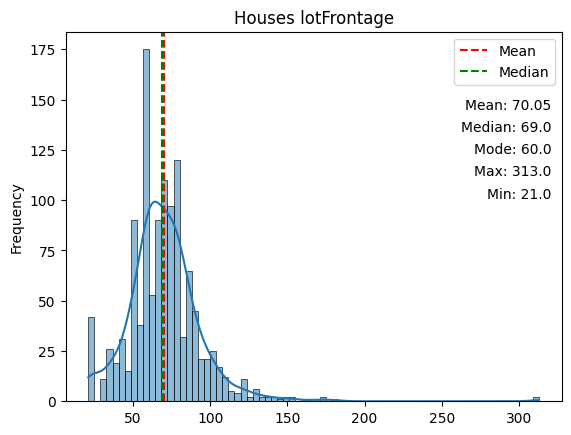

In [6]:
lotFrontage = data['LotFrontage'][~np.isnan(data['LotFrontage'])]
graphNumericDistribution(lotFrontage, 'Houses lotFrontage', '', 'Frequency')
print(lotFrontage.describe())

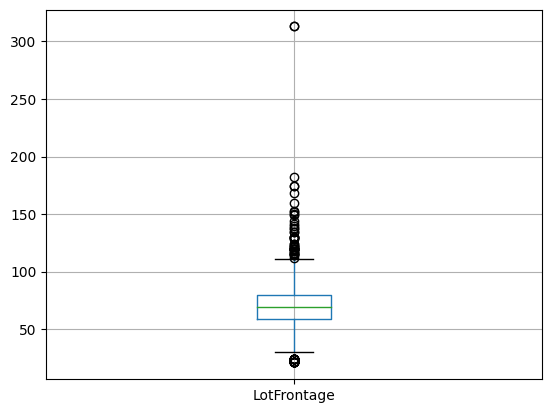

In [34]:
data[['LotFrontage']].boxplot()
plt.show()

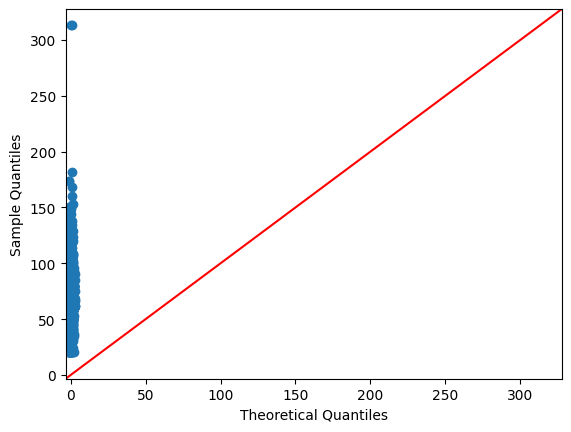

In [35]:
sm.qqplot(data[['LotFrontage']],line='45')

#### LotArea

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


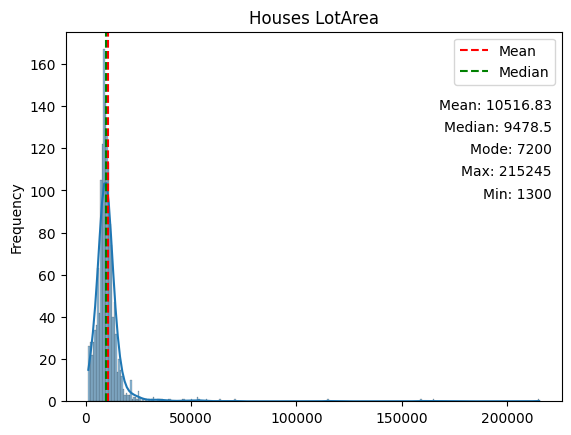

In [7]:
lotArea = data['LotArea'][~np.isnan(data['LotArea'])]
graphNumericDistribution(lotArea, 'Houses LotArea', '', 'Frequency')
print(lotArea.describe())

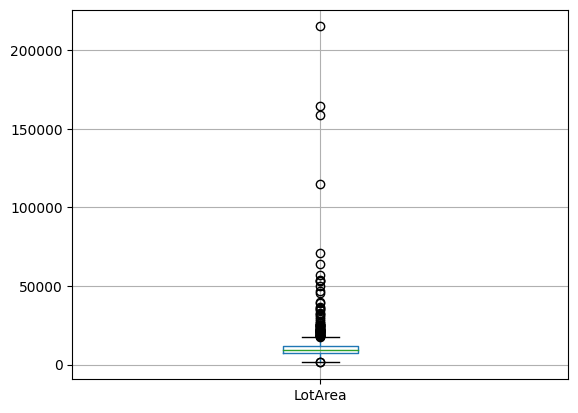

In [30]:
data[['LotArea']].boxplot()
plt.show()

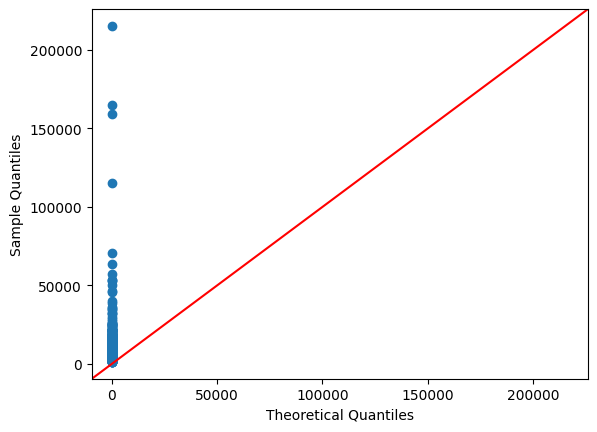

In [31]:
sm.qqplot(data[['LotArea']],line='45')

#### Sale price

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


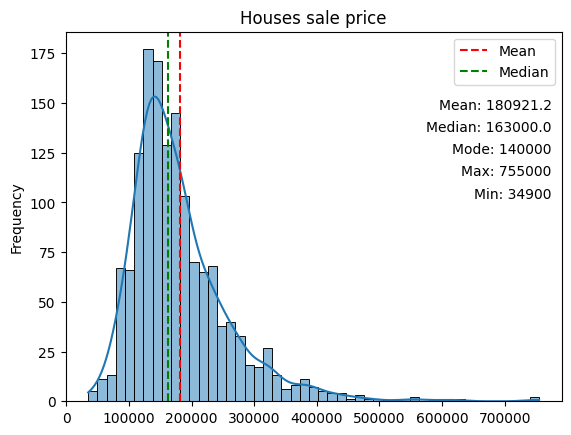

In [8]:
salePrice = data['SalePrice'][~np.isnan(data['SalePrice'])]
graphNumericDistribution(salePrice, 'Houses sale price', '', 'Frequency')
print(salePrice.describe())

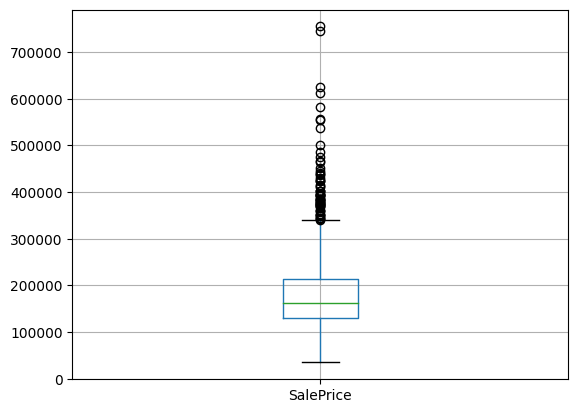

In [33]:
data[['SalePrice']].boxplot()
plt.show()

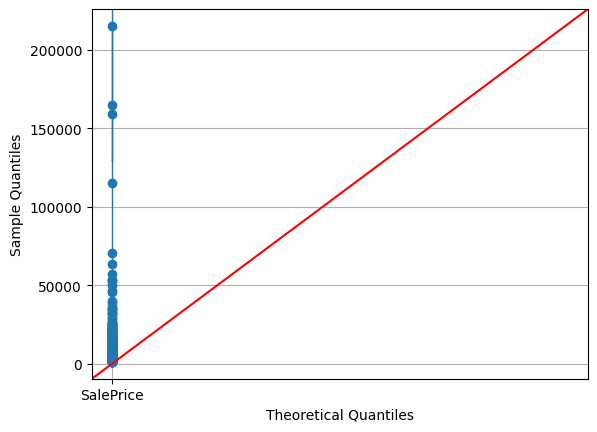

In [32]:
data[['SalePrice']].boxplot()
plt.show()

#### MasVnrArea

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


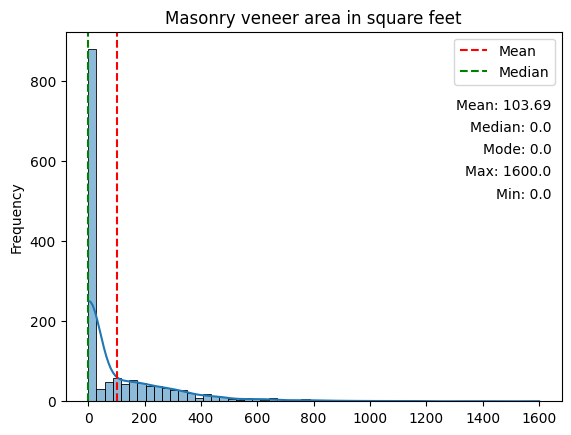

In [9]:
masVnrArea = data['MasVnrArea'][~np.isnan(data['MasVnrArea'])]
graphNumericDistribution(masVnrArea , 'Masonry veneer area in square feet', '', 'Frequency')
print(masVnrArea.describe())

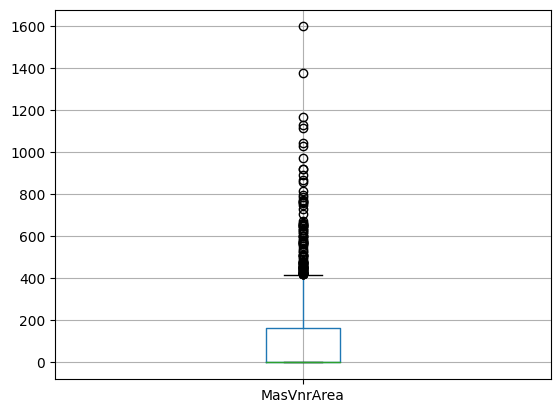

In [37]:
data[['MasVnrArea']].boxplot()
plt.show()

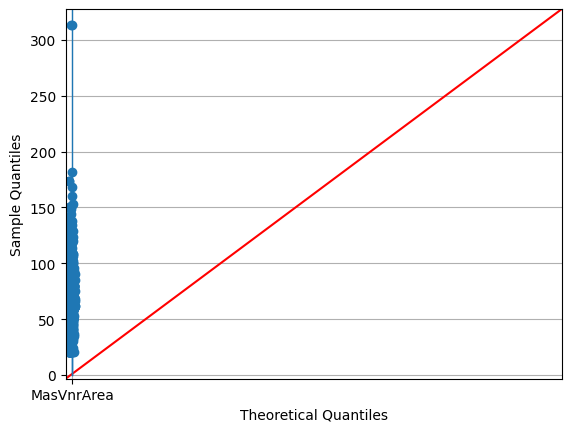

In [36]:
data[['MasVnrArea']].boxplot()
plt.show()